# Part 1: Cancer

In this part of the assignment, you will build a predictive model to classify a given breast tumor as cancer or not based on exam measurements of the size and shape of the tumor. 

**Learning objectives.** You will:
1. Study a binary classification task using cancer detection data 
2. Evaluate a simple baseline and compute its confusion matrix
3. Interpret the accuracy, precision, and recall of binary classifications
4. Train and test a logistic regression model for binary classification
5. Examine the impact of feature scaling on logistic regression training
6. Use cross validation to conduct a validation study over regularization hyperparameters
7. Train a high performance sparse binary classification model using reguralized logistic regression

The following code will download all of the data, print the feature names, and preview one example. The target value is binary: either `1` or `0`. `1`, the positive class, codes for benign (not cancer) and `0`, the negative class, codes for malignant (cancer).

The code stores the feature matrix `X` as a two-dimensional NumPy array where each row corresponds to a data point and each column is a feature. The target value is stored as a one-dimensional NumPy array `y` where the index `i` element of `y` correspsonds to the row `i` data point of `X`.

Your overall goal in this part is to build and evaluate a logistic model to predict the target variable `y` as a function of the ten features in `X` by predicting the probability that a given tumor is malignant.

In [3]:
# Run but DO NOT MODIFY this code

from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
cancer = load_breast_cancer()
print(f'The predictive targets are: {cancer.target_names}') 
print(f'The features are: {cancer.feature_names}')


# Get the feature data and target variable
X = cancer.data
y = cancer.target

# Preview the first data point
print(X[0])
print(y[0])

The predictive targets are: ['malignant' 'benign']
The features are: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
0


## Task 1

Randomly split the input data into [train and test partitions](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), with at least 30% of the data reserved for testing. Use a random seed of `2025` for reproducibility of the results. 

Print the number of data points in the resulting train and test partitions.

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
# Write code for task 1 here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2025)
counts = np.bincount(y_train, minlength = 2)
malignant_count = counts[0]
benign_count = counts[1]
print("Number of data points in the resulting train partitions is", X_train.shape[0])
print("Number of data points in the resulting test partitions is", X_test.shape[0])
print("Number of malignant (0) in training data is", malignant_count)
print("Number of benign (1) in training data is", benign_count)

Number of data points in the resulting train partitions is 398
Number of data points in the resulting test partitions is 171
Number of malignant (0) in training data is 149
Number of benign (1) in training data is 249


## Task 2

Build and evaluate a baseline model as follows.

  - Calculate the proportion of the training data with target `1`. Call this proportion `p`.
  - Set a [random seed](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html) of `2025` before starting for reproducibility.
  - For each example in the test data, randomly predict `1` with probability `p`, and `0` otherwise. You can do this in NumPy by either method:
    - [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)
    - [numpy.random.binomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html)

This baseline serves as a simple sanity check for our machine learning models. By predicting according to the class distribution observed in the training data, we establish a minimum performance threshold that any reasonable model should exceed. This approach captures the prior probability of each class without using any feature information and is similar in spirit to predicting the mean of a dataset for a regression task.

Compute and visualize the [confusion matrix](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#create-confusionmatrixdisplay) of the resulting predictions on the test data. 

Also compute and report the following three performance measures of the baseline predictions:
  - [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
  - [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
  - [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) 

Briefly interpret the accuracy, precision, and recall. What do these quantities mean in the context of the predictive task? Remember that `1` codes for benign (not cancer) and `0` codes for malignant (cancer).

The proportion is 0.6256281407035176
The accuracy is 0.6140350877192983
The precision is 0.6875
The recall is 0.7129629629629629


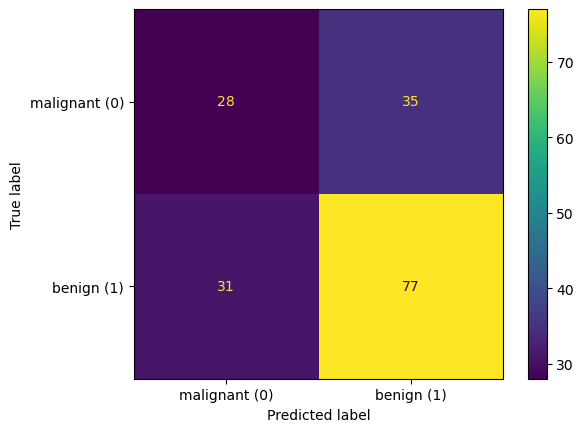

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
# Write code for task 2 here

p = np.mean(y_train == 1)
np.random.seed(2025)
y_prediction = np.random.binomial(n = 1, p = p, size = y_test.shape[0])
cm = confusion_matrix(y_test, y_prediction)
cm_display = ConfusionMatrixDisplay(cm, display_labels = ["malignant (0)", "benign (1)"]).plot()
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)
recall = recall_score(y_test, y_prediction)
print("The proportion is", p)
print("The accuracy is", accuracy)
print("The precision is", precision)
print("The recall is", recall)

The result I got for accuracy is 0.61. That means that the baseline model correctly classified about 61% of the tumors overall. The result I got for precision is 0.69. This means that for all instances that the model predicts a tumor is benign, about 69% of those predictions are actually correct. The result I got for recall is 0.71. This means that for tumors that are actually benign, the model successfully identified about 71% of the truly benign cases. Now in the context of cancer detection, based upon the results of the scores and the confusion matrix, it shows signs that the baseline model does miss a notable number of malignant cases that would be dangerous as in a medical setting, failing to identify cancer could delay or potentially prevent critical treatment that is needed. This ultimately meant that we need to make a better model than the current baseline model.

## Task 3

Fit a [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) on the train set with the parameter settings `penalty = None` (this will train a basic model without applying any regularization) and `random_state=2025` (for reproducibility). 

It is likely you will encounter a warning (Note that this is not an error and does not crash the code, it is merely a warning) that looks something like `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.` Unlike ordinary least squares regression, logistic regression cannot be solved as a system of linear equations, and instead an iterative solver is applied to compute the fit model weights. This warning indicates that the solver did not reach its `tol` for closeness to an optimal solution before reaching its `max_iter` number of iterations. One way to resolve this warning is to change the hyperparameter settings, for example by setting `tol` to 0.01 and `max_iter` to 10000. However, there is a more fundamental problem here.

One possible cause of the convergence warning is that the input features are on very different scales. For example, 'mean radius' might range from 6-28, while 'mean area' ranges from 143-2500. This can be challenging for iterative solvers where a single step size is used accross different features. It is also challenging when using regularization penalties -- features with larger scales will be penalized less by the regularization term, potentially leading to suboptimal performance.

For these reasons, it is common to scale the input features. Standard scaling such as that implemented by the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) in `sklearn` simply subtracts the mean and divides by the standard deviation of each feature (independently). This has the effect of centering each feature around 0 and enforcing a consistent scale, making it easier to fit models and select regularization hyperparameters.

For this task, do the following:

1. Use a [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to standardize the features (fit the scaler on the training data only, then transform both train and test sets). You only need to scale the input features, not the predictive targets.
2. Now fit a [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) on the train set with the parameter setting `penalty = None` (this will train a basic model without applying any regularization) and `random_state=2025` (for reproducibility). Set `max_iter` to 10000. This should suffice for the solver to converge without changing the default tolerance.
3. Use the model resulting fit model to make predictions on the train and the test data. Evaluate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) of the model predictions on both the train and the test data. Report both.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Write code for task 3 here

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logistic_regression = LogisticRegression(penalty = None, random_state = 2025, max_iter = 10000)
logistic_regression.fit(X_train_scaled, y_train)
y_train_prediction = logistic_regression.predict(X_train_scaled)
y_test_prediction = logistic_regression.predict(X_test_scaled)
train_accuracy = accuracy_score(y_train, y_train_prediction)
test_accuracy = accuracy_score(y_test, y_test_prediction)
print("The accuracy of the model predictions on the train data is", train_accuracy)
print("The accuracy of the model predictions on the test data is", test_accuracy)

The accuracy of the model predictions on the train data is 1.0
The accuracy of the model predictions on the test data is 0.9883040935672515


## Task 4

We will continue working with the scaled data in this task. The model we fit in task 3 used all of the input features. Is this necessary? In this part, study the tradeoff of a sparse model (that uses fewer features by setting some coefficients to 0) versus performance. Our goal will be to find a model that has good performance (in terms of accuracy) while also being sparse (a high proportion of coefficients set to 0). Such models are easier to interpret and require less data collection to use in practice.

Use a [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) with the hyperparameter settings `tol=0.01`, `max_iter=10000`, `penalty = 'l1'`, and `solver="liblinear"`. This will apply a regularization penalty on the sum of absolute values of coefficients and has the tendency to induce a sparse model, similar to LASSO for linear regression (see the [documentation example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#sphx-glr-auto-examples-linear-model-plot-logistic-l1-l2-sparsity-py)).

Conduct a validation study as follows by varying the `C` hyperparameter that controls the *inverse* magnitude of the regularization penalty (that is, the regularization penalty term is multiplied by `1/C`, [see the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression)). Try the following values for `C`: `[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]` as stored in the `param_range` array in the code below. For each value of `C`: 
  - Conduct [5-fold cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) on the scaled training data using `scoring="accuracy"`. Store the [mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) validation accuracy in the `val_scores` list in the code below.
  - Fit the model on the all of the scaled training data. Calculate the sparsity ratio of the model as the fraction of coefficients that are effectively 0. Consider any coefficient with absolute value less than 0.0001 to be effectively 0. Store the sparsity ratio in the `sparsity_ratios` list in the code below.

In [12]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Your hyperparameter range
param_range = np.array([0.001, 0.01, 0.1, 1.0, 10.0, 100.0])

# Storage for results
val_scores = []
sparsity_ratios = []

# todo: write code to complete task 4 here

for C in param_range:
    model = LogisticRegression(tol = 0.01, max_iter = 10000, penalty = 'l1', solver = 'liblinear', C = C, random_state = 2025)
    cross_validation_score = cross_val_score(model, X_train_scaled, y_train, cv = 5, scoring = 'accuracy')
    val_scores.append(np.mean(cross_validation_score))
    model.fit(X_train_scaled, y_train)
    coefficients = model.coef_
    sparsity_ratio = np.mean(np.abs(coefficients) < 0.0001)
    sparsity_ratios.append(sparsity_ratio)

When you have finished, you can run the second code cell below to visualize the results stored in your `val_scores` and `sparsity_ratios` lists.

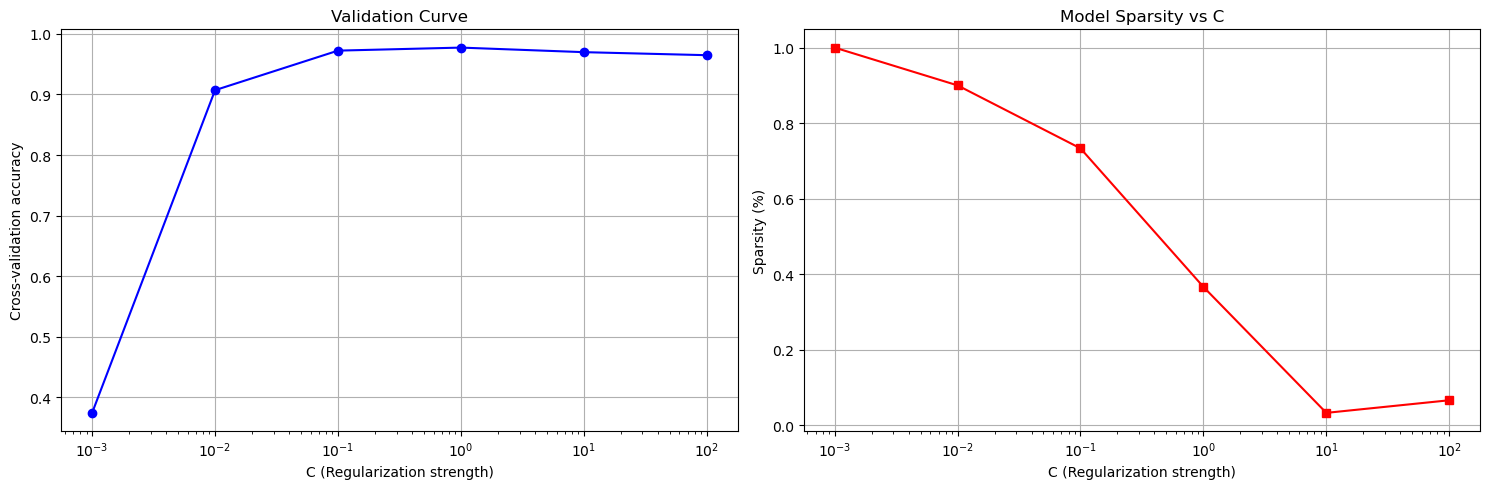

C		Accuracy	Sparsity Ratio
--------------------------------------------------
     0.001		0.374		      1.00
     0.010		0.907		      0.90
     0.100		0.972		      0.73
     1.000		0.977		      0.37
    10.000		0.970		      0.03
   100.000		0.965		      0.07


In [14]:
# Run, but do not modify this code
# Generates report and visualizations of your results

import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Validation curve
ax1.semilogx(param_range, val_scores, 'b-', marker='o')
ax1.set_xlabel('C (Regularization strength)')
ax1.set_ylabel('Cross-validation accuracy')
ax1.set_title('Validation Curve')
ax1.grid(True)

# Plot 2: Sparsity vs C
ax2.semilogx(param_range, sparsity_ratios, 'r-', marker='s')
ax2.set_xlabel('C (Regularization strength)')
ax2.set_ylabel('Sparsity (%)')
ax2.set_title('Model Sparsity vs C')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print detailed results
print("C\t\tAccuracy\tSparsity Ratio")
print("-" * 50)
for i, C in enumerate(param_range):
    print(f"{C:>10.3f}\t\t{val_scores[i]:.3f}\t\t{sparsity_ratios[i]:>10.2f}")

**QUESTION:** When you are satisfied with your results, briefly answer the following question, referencing your results. Suppose we want to maximize **both** accuracy **and** sparsity. No single result maximizes both. Based on your results, what are the two or three reasonable choices for `C`? Briefly explain your reasoning.

When I selected reasonable choices for C, I ensure that the C value can achieve great balance between high accuracy and high sparsity ratio. My first choice was C being 0.01 as it achieves very great sparsity ratio of 0.90 and decent accuracy of 0.907. My second chice was C being 1.0 as it acheives very great accuracy of 0.977 and decent sparsity ratio of 0.37. However, the best C value that I selected is 0.1 as it has the best balance out of all the C values where it has a high accuracy of 0.972 and a high sparsity ratio of 0.73. Looking at the table in the graph, there is a trend as when the C value decreases, we see that the sparsity ratio rises but at a cost of decreasing the accuracy like C being 0.001. On the other hand, C values above 1.0 like 10.0 and 100.0 does tend to have high accuracy but the sparsity ratio is or close to 0. Thus, the sweet spot of having a good balance between high accuracy and high sparsity ratio is where C is between 0.01 and 1.0.

## Task 5 (Bonus)

Another (arguably) even more interpretable classification model is a shallow decision tree. In this task you will compare your sparse logistic regression model with a shallow decision tree, considering both quantitative performance measures and human interpretability.

**Quantitative Performance Comparison.** Evaluate the performance of each model.
  - Select your preferred value of `C` from Task 4 based on the accuracy/sparsity trade-off you observed. Train a [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) using your chosen `C` value with the same hyperparameter settings from Task 4 (`penalty='l1'`, `solver='liblinear'`, `random_state=2025`, etc.).
  - Also train a [decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) with `max_depth=3` and `random_state=2025` on the same scaled training data. 
  - For both models, make predictions on the test set and compute the following (similar to what you did in Task 2):
    - Accuracy
    - Precision
    - Recall
    - Confusion matrix (visualized)

Report all metrics and the confusion matrix plots.

In [18]:
# Write code for Task 5 quantitative performance comparison here


**Interpretation Questions**
Suppose you have to explain the following to a hospital administrator with no machine learning background who is considering using one of your models for cancer diagnosis. Answer the following in 2-3 sentences each, referencing your results from the quantiative performance comparison and model interpretability analysis of the sparse regularized logistic regression and shallow decision tree models. 

Answer the following questions.
1. How does each model make predictions? Describe in plain language how the trained logistic regression and decision tree models arrive at their predictions.
2. Which model would you recommend for this hospital and why? Consider accuracy, interpretability, and trust from medical professionals when making your recommendation.
3. What are the key advantages and limitations of your recommended model? Reference your computed metrics and model inspection results to support your answer.

(optional) While this is not required, you may find the following helpful in answering the above questions.
  - For the logistic regression model: You can inspect the model coefficients using the `.coef_` attribute.
  - For the decision tree: You can visualize the decision rules using `plot_tree` as in the code snippet below. The code snippet supposes that your decision tree model is called `tree_model` -- you can substitute your variable name.
```
# Decision tree interpretability - visualize tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plot_tree(tree_model, feature_names=cancer.feature_names, 
          class_names=['Malignant', 'Benign'], filled=True, 
          impurity=False, fontsize=11)
plt.title('Decision Tree Structure')
plt.show()
```
Note that in the decision tree visualizaiton, a condition evaluating to `True` follows the **left** branch by convention.

In [20]:
# (optional additional code for Task 5 here)


*Answer Task 5 questions here*
